In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset=sns.load_dataset("titanic")
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
dataset.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dataset.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
features=["pclass","age","embarked","sex","fare"]
target=["survived"]

In [7]:
features=["pclass","age","embarked","sex","fare"]


In [12]:
from sklearn.impute import SimpleImputer
imp_median=SimpleImputer(strategy="median")
dataset[["age"]]=imp_median.fit_transform(dataset[["age"]])

imp_freq=SimpleImputer(strategy="most_frequent")
dataset[["embarked"]]=imp_freq.fit_transform(dataset[["embarked"]])

In [13]:
dataset.isnull().sum()


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["sex"]=le.fit_transform(dataset["sex"])
dataset["embarked"]=le.fit_transform(dataset["embarked"])

In [16]:
X=dataset[features]
y=dataset[target]

In [17]:
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.head()

,pclass,age,embarked,sex,fare
331,1,45.5,2,1,28.5000
733,2,23.0,2,1,13.0000
382,3,32.0,2,1,7.9250
704,3,26.0,2,1,7.8542
813,3,6.0,2,0,31.2750


In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [23]:
y_predict=dtc.predict(X_test)

In [24]:
print(f"Accuracy: {dtc.score(X_test,y_test)}")

Accuracy: 0.770949720670391


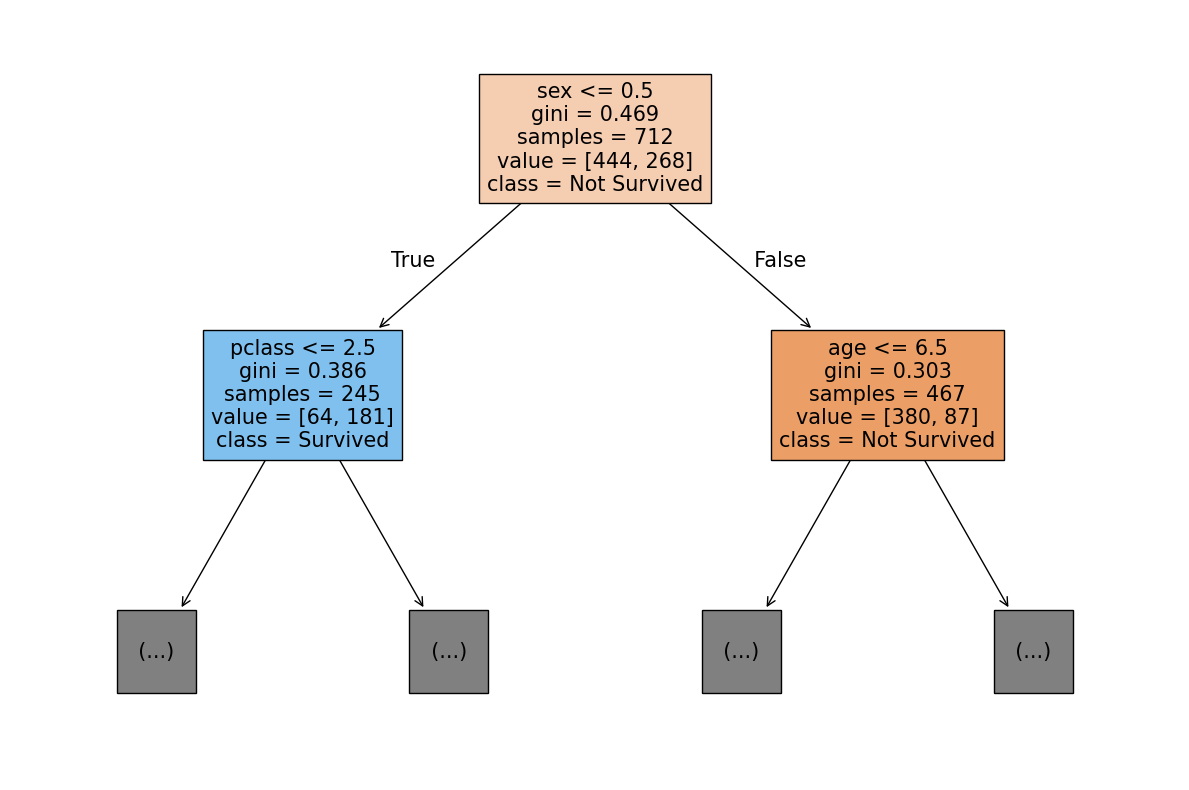

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtc,feature_names=features,max_depth=1,class_names=["Not Survived","Survived"],filled=True)
plt.tight_layout()
plt.show()

In [ ]:
#with pruning
depths=[2,3,4,5,6,7,8,9,10]
for i in depths:
    dtc_pruned=DecisionTreeClassifier(max_depth=i)
    dtc_pruned.fit(X_train,y_train)
    print(f"Accuracy with max_depth={i}: {dtc_pruned.score(X_test,y_test)}")

Accuracy with max_depth=2: 0.7653631284916201
Accuracy with max_depth=3: 0.7988826815642458
Accuracy with max_depth=4: 0.7988826815642458
Accuracy with max_depth=5: 0.7988826815642458
Accuracy with max_depth=6: 0.8044692737430168
Accuracy with max_depth=7: 0.7932960893854749
Accuracy with max_depth=8: 0.7988826815642458
Accuracy with max_depth=9: 0.7932960893854749
Accuracy with max_depth=10: 0.7988826815642458


In [30]:
dtc_pruned=DecisionTreeClassifier(max_depth=6)
dtc_pruned.fit(X_train,y_train)
print(f"Accuracy with max_depth={i}: {dtc_pruned.score(X_test,y_test)}")

Accuracy with max_depth=10: 0.7988826815642458


In [ ]:
#with pruning
depths=[2,3,4,5,6,7,8,9,10]
for i in depths:
    dtc_pruned=DecisionTreeClassifier(max_depth=i)
    dtc_pruned.fit(X_train,y_train)
    print(f"Accuracy with max_depth={i}: {dtc_pruned.score(X_test,y_test)}")
    from sklearn.tree import plot_tree
    if split==10:
        plt.figure(figsize=(12,10))
        plot_tree(dtc,feature_names=features,max_depth=1,class_names=["Not Survived","Survived"],filled=True)
        plt.tight_layout()
        plt.show()

Accuracy with max_depth=2: 0.7653631284916201


NameError: name 'split' is not defined

In [34]:
#with post_pruning
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)
path=tree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]

In [35]:
tree=[]
for alpha in ccp_alphas:
    dtc=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
    dtc.fit(X_train,y_train)
    tree.append(dtc)

In [38]:
best_acc=0
best_alpha=0
for dtc,alpha in tree:
    curr_acc=model.score(X_test,y_test)
    if curr_acc>best_acc:
        best_acc=curr_acc
        best_alpha=alpha

TypeError: cannot unpack non-iterable DecisionTreeClassifier object